<a href="https://colab.research.google.com/github/mahault/Quantum-C/blob/main/Quantum_Lagrangian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

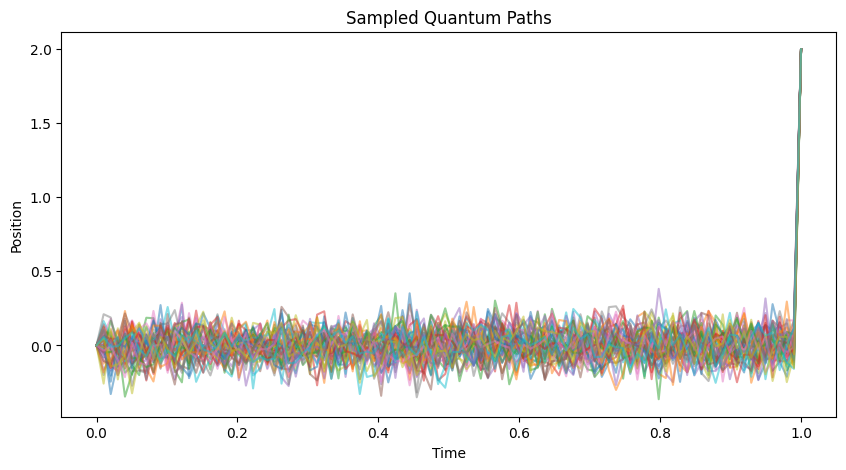

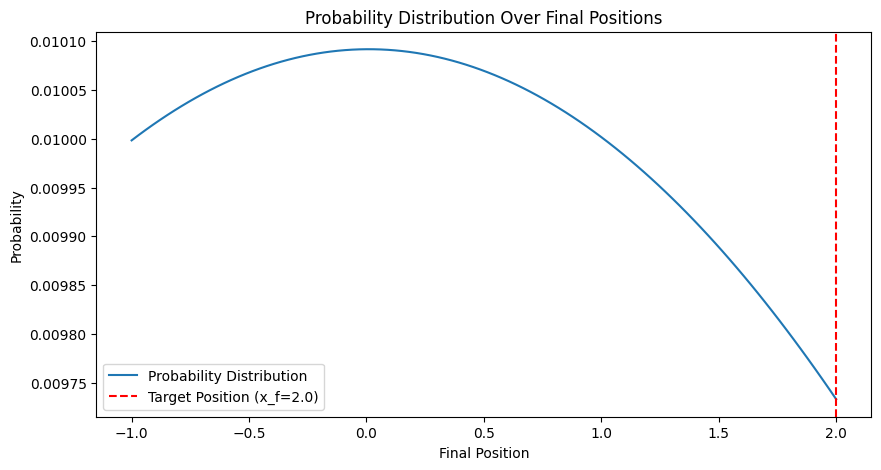

Normalized Probability Distribution Over Final Positions: [0.00999837 0.01000388 0.01000922 0.0100144  0.01001941 0.01002426
 0.01002894 0.01003345 0.0100378  0.01004198 0.01004599 0.01004983
 0.01005351 0.01005702 0.01006037 0.01006354 0.01006655 0.01006939
 0.01007206 0.01007456 0.01007689 0.01007906 0.01008106 0.01008288
 0.01008454 0.01008603 0.01008735 0.0100885  0.01008948 0.01009029
 0.01009094 0.01009141 0.01009171 0.01009185 0.01009181 0.01009161
 0.01009124 0.01009069 0.01008998 0.0100891  0.01008805 0.01008683
 0.01008544 0.01008389 0.01008216 0.01008026 0.0100782  0.01007597
 0.01007356 0.010071   0.01006826 0.01006535 0.01006228 0.01005903
 0.01005563 0.01005205 0.0100483  0.01004439 0.01004031 0.01003607
 0.01003166 0.01002708 0.01002234 0.01001743 0.01001235 0.01000711
 0.0100017  0.00999613 0.0099904  0.0099845  0.00997844 0.00997221
 0.00996582 0.00995927 0.00995255 0.00994567 0.00993863 0.00993143
 0.00992407 0.00991655 0.00990886 0.00990102 0.00989301 0.00988485
 0.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
hbar = 1.0  # Reduced Planck's constant
m = 1.0  # Mass of the particle
T = 1.0  # Time interval
x0 = 0.0  # Start point
n_steps = 100  # Number of time steps
n_paths = 1000  # Number of sampled paths
n_positions = 100  # Number of final positions to evaluate

# Time grid
dt = T / n_steps
time = np.linspace(0, T, n_steps)
final_positions = np.linspace(-1.0, 2.0, n_positions)  # Range of possible final positions

# Generate random paths
paths = np.zeros((n_paths, n_steps))
for i in range(n_paths):
    # Create random deviations for the path
    deviations = np.random.normal(0, np.sqrt(dt), size=n_steps - 2)
    paths[i, 1:-1] = deviations

# Calculate the action for each path
def action(path):
    kinetic_energy = 0.5 * m * np.sum(np.diff(path)**2) / dt
    return kinetic_energy * dt

# Compute amplitudes for all final positions
amplitudes = []
for xf in final_positions:
    total_amplitude = 0
    for path in paths:
        # Adjust the final point of the path to xf
        path[-1] = xf
        S = action(path)
        total_amplitude += np.exp(1j * S / hbar)
    amplitudes.append(total_amplitude)

# Compute probabilities
probabilities = np.abs(amplitudes)**2
probabilities /= np.sum(probabilities)  # Normalize probabilities

# Find normalized probability for a specific final position (e.g., xf = 1.0)
xf_target = 2.0
xf_index = np.argmin(np.abs(final_positions - xf_target))
normalized_probability = probabilities[xf_index]

# Visualization of paths
plt.figure(figsize=(10, 5))
for i in range(50):  # Plot a subset of paths
    plt.plot(time, paths[i], alpha=0.5)
plt.title("Sampled Quantum Paths")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

# Visualization of probability distribution
plt.figure(figsize=(10, 5))
plt.plot(final_positions, probabilities, label="Probability Distribution")
plt.axvline(x=xf_target, color="r", linestyle="--", label=f"Target Position (x_f={xf_target})")
plt.title("Probability Distribution Over Final Positions")
plt.xlabel("Final Position")
plt.ylabel("Probability")
plt.legend()
plt.show()

print("Normalized Probability Distribution Over Final Positions:", probabilities)
print(f"Normalized Probability of Particle at x_f={xf_target}: {normalized_probability}")

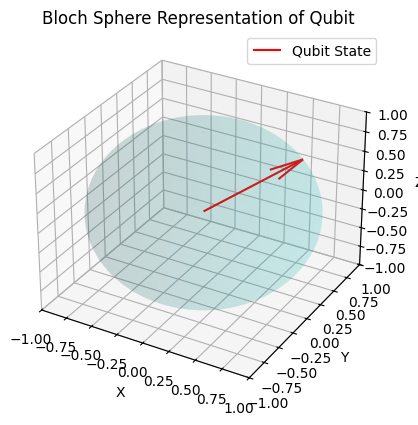

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def bloch_vector(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return np.array([x, y, z])

# Example parameters
theta = np.pi / 3  # Amplitude angle
phi = np.pi / 4    # Phase angle

# Compute Bloch vector
vec = bloch_vector(theta, phi)

# Plot the Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.sin(v), np.cos(u))
y = np.outer(np.sin(v), np.sin(u))
z = np.outer(np.cos(v), np.ones_like(u))
ax.plot_surface(x, y, z, color='c', alpha=0.1)

# Plot vector
ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r', label="Qubit State")

# Set plot limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.title("Bloch Sphere Representation of Qubit")
plt.show()
